**DRUG CLASSIFICATION** 

L'ensemble de données contient diverses informations qui affectent les prédictions telles que l'âge, le sexe, la tension artérielle, les niveaux de cholestérol, le rapport Na/potassium et enfin le type de médicament.


1.Age->Age of patient

2.Sex->Gender of Patient

3.BP->Blood Pressure

4.Cholesterol

5.Na_to_K->Sodium to Potassium ratio

6.Drug->Drug type(Target Variable

In [ ]:
pip install category_encoders==1.3.0


**Importer des bibliothèques**

In [ ]:
import numpy as np #Linear Algebra
import pandas as pd #Data processing , CSV file I/O
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
from sklearn import preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import *
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from datetime import datetime
import urllib
import requests
from io import StringIO
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



**Chargement de dataset**


In [ ]:
url='https://drive.google.com/file/d/13U1QnOxPFQzQNSsvUuz6CUoILKcnaKMq/view?usp=sharing'

file_id = url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)
data = pd.read_csv(csv_raw)
print(data.head())


   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.shape

(200, 6)

La dataset contient 200 lignes × 6 colonnes

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247




L'âge moyen des patients est: 44.315


In [ ]:
data.isnull().sum() 


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Cheking les valeurs nulles

In [ ]:
data.duplicated().sum() 


0

Checking les valeurs dupliquées

***L'analyse exploratoire des données***

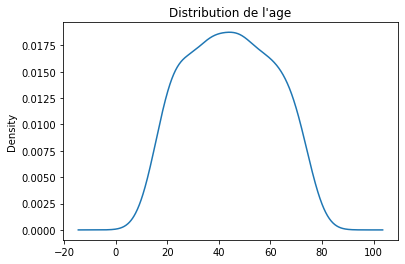

In [ ]:
plt.title("Distribution de l'age")
data['Age'].plot(kind='kde')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



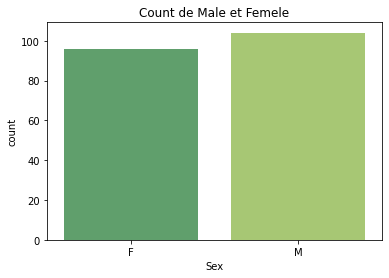

In [ ]:
plt.title("Count de Male et Femele")
sns.countplot(data['Sex'],palette='summer')


In [ ]:
data['Sex'].value_counts()  #2 types de categorial data


M    104
F     96
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



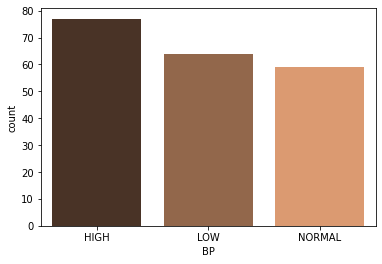

In [ ]:
sns.countplot(data['BP'],palette='copper')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



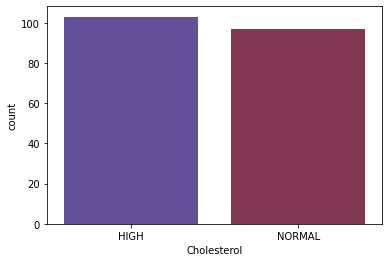

In [ ]:
sns.countplot(data['Cholesterol'],palette='twilight')


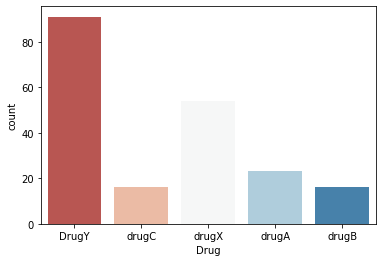

In [ ]:
sns.countplot(x = 'Drug',data=data,palette='RdBu')
plt.show()


Le médicament Y est le plus utilisé chez les patients


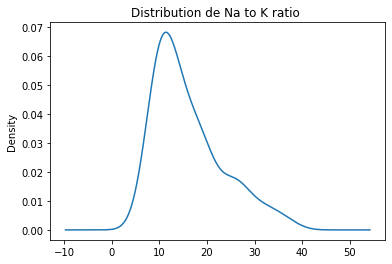

In [ ]:
plt.title("Distribution de Na to K ratio ")
data['Na_to_K'].plot(kind='kde')


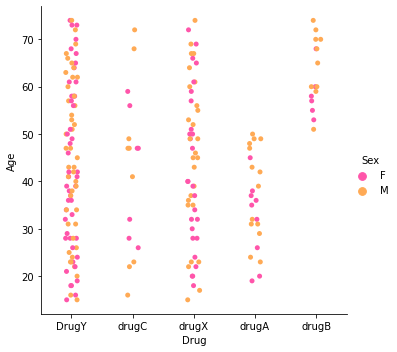

In [ ]:
sns.catplot(x="Drug", y="Age",hue="Sex",data=data,palette='spring')




Le médicament B n'est utilisé que par les patients qui ont plus de 50 ans

Le médicament A n'est utilisé que par les patients qui ont moins de 50 ans


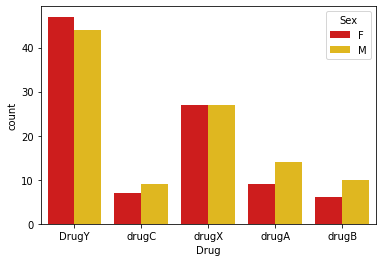

In [ ]:
sns.countplot(data=data,x='Drug',hue='Sex',palette='hot')


Le médicament Y est utilisé plus par les femmes tandis que d'autres sont davantage utilisés par les hommes

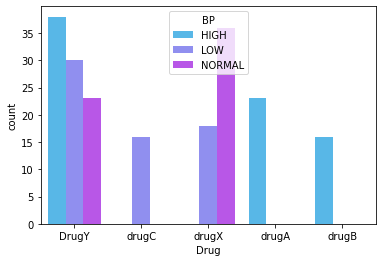

In [ ]:
sns.countplot(data=data,x='Drug',hue='BP',palette='cool')


Le médicament Y est principalement utilisé par les personnes ayant un pb ÉLEVÉ

Le médicament C n'est utilisé que par les personnes ayant un Pb FAIBLE

Le médicament X n'est pas utilisé par les personnes ayant un pb ÉLEVÉ

Les médicaments A et B ne sont utilisés que par les personnes ayant un pb ÉLEVÉ


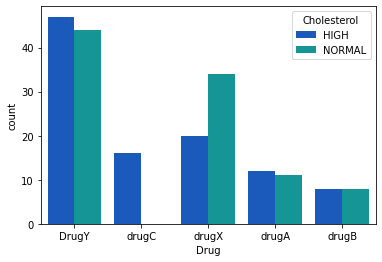

In [ ]:
sns.countplot(data=data,x='Drug',hue='Cholesterol',palette='winter')


Le médicament C n'est pris que par les personnes ayant un taux de cholestérol ÉLEVÉ



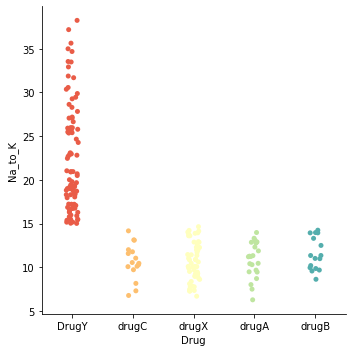

In [ ]:
sns.catplot(x="Drug", y="Na_to_K",data=data,palette='Spectral')


Le médicament Y n'est utilisé que par les patients avec  Na to k ratio > 15




In [ ]:
data_Sex_Drug = data.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
data_Sex_Drug


,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


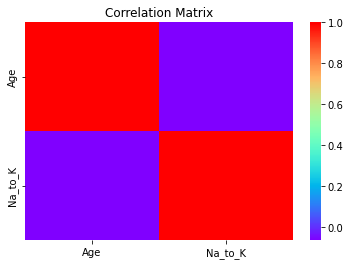

In [ ]:
plt.title("Correlation Matrix")
sns.heatmap(data.corr(),cmap='rainbow')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



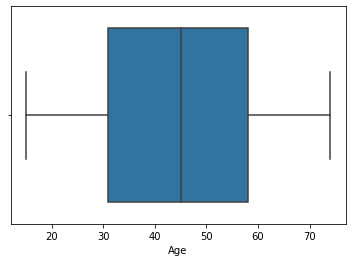

In [ ]:
sns.boxplot(data['Age'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



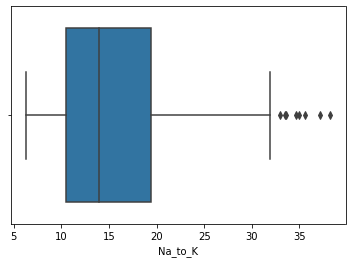

In [ ]:
sns.boxplot(data['Na_to_K'])


Il y a des valeurs aberrantes



**Préparation des données**

*One*-Hot Encoding


In [ ]:
# One-hot encode the data using pandas get_dummies
data1=pd.get_dummies(data=data,columns=["BP","Cholesterol",'Sex'],drop_first=True)
data1


,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,DrugY,0,0,0,0
1,47,13.093,drugC,1,0,0,1
2,47,10.114,drugC,1,0,0,1
3,28,7.798,drugX,0,1,0,0
4,61,18.043,DrugY,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,0
196,16,12.006,drugC,1,0,0,1
197,52,9.894,drugX,0,1,0,1
198,23,14.020,drugX,0,1,1,1


Les colonnes sont maintenant des nombres, comme l'algorithme l'aime



In [ ]:
c1='Drug'
label_encoder = preprocessing.LabelEncoder() 
data1[c1]= label_encoder.fit_transform(data1[c1]) 
data1[c1].unique()
data1


,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Sex_M
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,0,0,1
2,47,10.114,3,1,0,0,1
3,28,7.798,4,0,1,0,0
4,61,18.043,0,1,0,0,0
...,...,...,...,...,...,...,...
195,56,11.567,3,1,0,0,0
196,16,12.006,3,1,0,0,1
197,52,9.894,4,0,1,0,1
198,23,14.020,4,0,1,1,1


Encoder les target labels avec une valeur comprise entre 0 et n_classes-1



Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1.drop(['Drug'],axis = 1))


StandardScaler()

Feature Selection


In [ ]:
Y = data1['Drug']
X = data1.drop('Drug',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)


In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)


Training Features Shape: (140, 6)
Training Labels Shape: (140,)
Testing Features Shape: (60, 6)
Testing Labels Shape: (60,)


**Prediction**

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, Y_train, cv=5)
rfc.fit(X_train,Y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,Y_test))

Train Score: 0.9928571428571429
Test Score: 0.95
